#  CIS 545 final Project : Machine Learning (Introduction/ Background)
## Dinesh Jagai  (PennID - 22966756)
## N.B. - Submitting this as both first and second deliverables  

---


![alt text](https://drive.google.com/uc?export=view&id=1Al0GiOI0EjVcBQSn_jGIMx_R-nMvWQrr)


---


**Data Source**
The data is from Kaggle (https://www.kaggle.com/sobhanmoosavi/us-accidents) and represents countrywide traffic accidents in the US from (2016 -2019).


---


**Objective**
- During this project, I shall investigate how the different features of the data affect the severity of an accident taking place – for example, I shall be investigating the impact of Temperature(F),Wind_Chill(F),Humidity(%), Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in) on the accident occurrence and severity. The overall objective is to make a model that predicts the severity of an accident given certain environmental features- to do this I shall be using logistic regression. 


---



**Importance**
- Predicting the occurrence of an accident based on the given environmental features is extremely important as it can be used to inform the respective authorities on policies that can be implemented to reduce them from occurring. 
These insighhts will greatly benefit applications such urban planning and improving transportation. Furthermore, I believe this project contains most, if not all, of the concepts that we’ve learned throughout this semester. There is also room to learn new concepts such as mean/regression-based imputations to fill in the missing values for the different features. 


---



In [0]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

**Libraries**

In [0]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from IPython.display import Image
import glob
import seaborn as sns
import re
import os

# Machine Learning libraries
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



Import the files - stored on AWS for convenience 

In [0]:
import boto3
from botocore import UNSIGNED

from botocore.config import Config

s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
s3.Bucket('cis-545-final-project').download_file('us-accidents.zip', 'us-accidents.zip')

!unzip /content/us-accidents.zip

    

#Columns/Features & Description of Data 

- **ID** : This is a unique identifier of the accident record.
-**Source** : Indicates the source of the accident report (i.e. the API which reported the accident.).
-**TMC** : A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
-**Severity** : Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a 	result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)
-**Start_Time** : Shows start time of the accident in local time zone.
-**End_Time** : Shows end time of the accident in local time zone.
-**Start_Lat** : Shows latitude in GPS coordinate of the start point.
-**Start_Lng** : Shows longitude in GPS coordinate of the start point.
-**End_Lat** : Shows latitude in GPS coordinate of the end point.
-**End_Lng** : Shows longitude in GPS coordinate of the end point.
-**Distance(mi)** : The length of the road extent affected by the accident.
-**Description** : Shows natural language description of the accident.
-**Number** : Shows the street number in address field.
-**Street** : Shows the street name in address field.
-**Side** : Shows the relative side of the street (Right/Left) in address field.
-**City** : Shows the city in address field.
-**County** : Shows the county in address field.
-**State** : Shows the state in address field.
-**Zipcode** : Shows the zipcode in address field.
-**Country** : Shows the country in address field.
-**Timezone** : Shows timezone based on the location of the accident (eastern, central, etc.).
-**Airport_Code** : Denotes an airport-based weather station which is the closest one to location of the accident.
-**Weather_Timestamp** : Shows the time-stamp of weather observation record (in local time).
-**Temperature(F)** : Shows the temperature (in Fahrenheit).
-**Wind_Chill(F)** : Shows the wind chill (in Fahrenheit).
-**Humidity(%)** : Shows the humidity (in percentage).
-**Pressure(in)** : Shows the air pressure (in inches).
-**Visibility(mi)** : Shows visibility (in miles).
-**Wind_Direction** : Shows wind direction.
-**Wind_Speed(mph)** : Shows wind speed (in miles per hour).
-**Precipitation(in)** : Shows precipitation amount in inches, if there is any.
-**Weather_Condition** : Shows the weather condition (rain, snow, thunderstorm, fog, etc.).
-**Amenity** : A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.
-**Bump** : A POI annotation which indicates presence of speed bump or hump in a nearby location.
-**Crossing** : A POI annotation which indicates presence of crossing in a nearby location.
-**Give_Way** : A POI annotation which indicates presence of give_way sign in a nearby location.
-**Junction** : A POI annotation which indicates presence of junction in a nearby location.
-**No_Exit** : A POI annotation which indicates presence of no_exit sign in a nearby location.
-**Railway** : A POI annotation which indicates presence of railway in a nearby location.
-**Roundabout** : A POI annotation which indicates presence of roundabout in a nearby location.
-**Station** : A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.
-**Stop** : A POI annotation which indicates presence of stop sign in a nearby location.
-**Traffic_Calming** : A POI annotation which indicates presence of traffic_calming means in a nearby location.
-**Traffic_Signal** : A POI annotation which indicates presence of traffic_signal in a nearby location.
-**Turning_Loop** : A POI annotation which indicates presence of turning_loop in a nearby location.
-**Sunrise_Sunset** : Shows the period of day (i.e. day or night) based on sunrise/sunset.
-**Civil_Twilight** : Shows the period of day (i.e. day or night) based on civil twilight.
-**Nautical_Twilight** : Shows the period of day (i.e. day or night) based on nautical twilight.
-**Astronomical_Twilight** : Shows the period of day (i.e. day or night) based on astronomical twiligh

#1) Visualizing the Data Before Cleaning (EDA)


In [0]:
# Convert into a dataframe
us_accidents_df = pd.read_csv('/content/US_Accidents_Dec19.csv', header=0);

In [0]:
us_accidents_df.head(5)
# us_accidents_df.shape

ID    Source    TMC  ...  Civil_Twilight Nautical_Twilight Astronomical_Twilight
0  A-1  MapQuest  201.0  ...           Night             Night                 Night
1  A-2  MapQuest  201.0  ...           Night             Night                   Day
2  A-3  MapQuest  201.0  ...           Night               Day                   Day
3  A-4  MapQuest  201.0  ...             Day               Day                   Day
4  A-5  MapQuest  201.0  ...             Day               Day                   Day

[5 rows x 49 columns]

From the table above, we can see that their are many NaN values, inspecting futher, we can see that Turing_Loop is always false and End_Lat and End_Lng is always NaN. As such,we remove these coloumns and rows when cleaning our data before sending it into our model. 
Since removing the NaNs distort our data - they aren't remove until after the EDA (i.e. before our data is sent into our model) 

# 2) Cleaning the Data For EDA (EDA)


-  Get rid of missing coloumns(End_Lat, End_Lng) 
-  Get rid of coloumns that don't have meaningful data these include 
    - i) Turning_Loop (it's always False)
-  Convert to he 'Start_Time' and 'End_time' features are not in a unix datetime format
- Note that rows with NaNs are not dropped in this step because they drastically diminsh the data and DO NOT give a sense of it! 




In [0]:
# get rid of missing rows and missing elements
us_accidents_df.drop(['End_Lat','End_Lng'],inplace=True, axis=1);
us_accidents_df.drop(['Turning_Loop'],inplace=True, axis=1);
# Convert to date time 
us_accidents_df.loc[:,'Start_Time'] = pd.to_datetime(us_accidents_df['Start_Time'], infer_datetime_format= True);
us_accidents_df.loc[:,'End_Time'] = pd.to_datetime(us_accidents_df['End_Time'], infer_datetime_format= True);
 
# (us_accidents_df.fillna(us_accidents_df.mean(), inplace=True))  #Try mean Imputation
us_accidents_df.head(5)

ID    Source    TMC  ...  Civil_Twilight Nautical_Twilight Astronomical_Twilight
0  A-1  MapQuest  201.0  ...           Night             Night                 Night
1  A-2  MapQuest  201.0  ...           Night             Night                   Day
2  A-3  MapQuest  201.0  ...           Night               Day                   Day
3  A-4  MapQuest  201.0  ...             Day               Day                   Day
4  A-5  MapQuest  201.0  ...             Day               Day                   Day

[5 rows x 46 columns]

The data looks much better! However, there are a few uncessary coloumns and NaN values. We shall remove them before creating and training our model but leave them for the EDA. This was decided after removing them intially drastically reduced the data by 92% making the figures difficult to analyze. 




# 3)Visualizing the Data (EDA) 


#### i) General overview of the data after Cleaning

In [0]:
# Data analysis/visualization
# data visulization (some cool stuff in the data)

print(us_accidents_df.shape)
print(us_accidents_df.dtypes)



(2974335, 46)
ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)              

#### ii) Simple statistics like mean, standard deviation, min annd max for each of the numerical features


In [0]:
# Find the maxs
maxs = [us_accidents_df['Severity'].max(),us_accidents_df['Distance(mi)'].max(), us_accidents_df['Temperature(F)'].max(), us_accidents_df['Wind_Chill(F)'].max(), us_accidents_df['Humidity(%)'].max(), us_accidents_df['Pressure(in)'].max(),us_accidents_df['Visibility(mi)'].max(), us_accidents_df['Wind_Speed(mph)'].max(), us_accidents_df['Precipitation(in)'].max()];
# Find the mins
mins = [us_accidents_df['Severity'].min(),us_accidents_df['Distance(mi)'].min(), us_accidents_df['Temperature(F)'].min(), us_accidents_df['Wind_Chill(F)'].min(), us_accidents_df['Humidity(%)'].min(), us_accidents_df['Pressure(in)'].min(),us_accidents_df['Visibility(mi)'].min(), us_accidents_df['Wind_Speed(mph)'].min(), us_accidents_df['Precipitation(in)'].min()];
# Find the standard Deviations 
stds = [us_accidents_df['Severity'].std(),us_accidents_df['Distance(mi)'].std(), us_accidents_df['Temperature(F)'].std(), us_accidents_df['Wind_Chill(F)'].std(), us_accidents_df['Humidity(%)'].std(), us_accidents_df['Pressure(in)'].std(),us_accidents_df['Visibility(mi)'].std(), us_accidents_df['Wind_Speed(mph)'].std(), us_accidents_df['Precipitation(in)'].std()];
# Find the means
means = [us_accidents_df['Severity'].mean(),us_accidents_df['Distance(mi)'].mean(), us_accidents_df['Temperature(F)'].mean(), us_accidents_df['Wind_Chill(F)'].mean(), us_accidents_df['Humidity(%)'].mean(), us_accidents_df['Pressure(in)'].mean(),us_accidents_df['Visibility(mi)'].mean(), 
us_accidents_df['Wind_Speed(mph)'].mean(), us_accidents_df['Precipitation(in)'].mean()];
# Display them 
l = ['Severity','Distance(mi)', 'Temperature(F)','Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'];
for i in range(0, len(l)):
    print("For Feature %s --- Mean = %s, Max = %s, Min = %s, stds = %s" % (l[i],means[i], maxs[i], mins[i], stds[i])); 





For Feature Severity --- Mean = 2.360190092911525, Max = 4, Min = 1, stds = 0.5414733263200973
For Feature Distance(mi) --- Mean = 0.2855653569462776, Max = 333.63000488299997, Min = 0.0, stds = 1.548392025469649
For Feature Temperature(F) --- Mean = 62.351203143500875, Max = 170.6, Min = -77.8, stds = 18.788549112761032
For Feature Wind_Chill(F) --- Mean = 51.32684860287798, Max = 115.0, Min = -65.9, stds = 25.191270556570807
For Feature Humidity(%) --- Mean = 65.40541554808961, Max = 100.0, Min = 1.0, stds = 22.556763456529684
For Feature Pressure(in) --- Mean = 29.83189500829412, Max = 33.04, Min = 0.0, stds = 0.7213808414184919
For Feature Visibility(mi) --- Mean = 9.150769970473997, Max = 140.0, Min = 0.0, stds = 2.892113743782288
For Feature Wind_Speed(mph) --- Mean = 8.298063781468155, Max = 822.8, Min = 0.0, stds = 5.138545725122648
For Feature Precipitation(in) --- Mean = 0.02049450960422857, Max = 25.0, Min = 0.0, stds = 0.23577039560973578


Some notable inferences from these values are 
- Severity seems to mainly be around 2 to 3 with the Max being 4 
- Temperatue(F), Wind_Chill(F), Humidity all have a high standard deviation (varies frequently) 
- Precipitation(in) has a very low mean and an extremely high standard deviation which means it varies by a wide margin (this is shown by the Max = 25 and min = 0). 
I.e. most of the values are centered around 0 
To visualize these numbers futher, we shall look at them using a box plot for the severity and the Precipitation(in)


#### iii)  Visualize data for severity (y) and precipitation using box wiskers


In [0]:
# Function to plot the boxplot. 
# Input - feature name 
def boxPlot(s):
    data_to_plot = [us_accidents_df[s]];                         
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6));

    # Create an axes instance
    ax = fig.add_subplot(111);
                            
    ## to get fill color
    bp = ax.boxplot(data_to_plot, patch_artist=True);

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ax.set_xticklabels([s]);
  

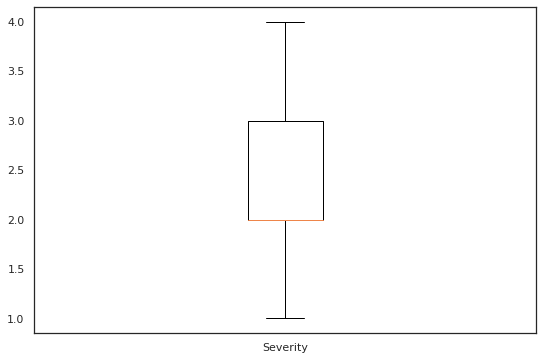

In [0]:
# Displays the data for both the Severity                         
boxPlot('Severity')                    

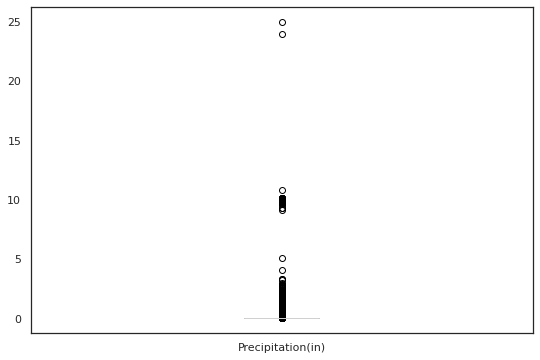

In [0]:
# Displays the data for both the Precipitation(in)   
fig = plt.figure(1, figsize=(9, 6));
us_accidents_df.boxplot(column=['Precipitation(in)'], 
                       grid=False, patch_artist = True)

In the Severity Box plot, note that the majority of values are centered around 2 and 3 - consistent with our mean and standard deviation values before. 
Note that for the precipitation, the majority of the values center hover around 0 with a notable amount in the 10 -12 range. Also, a different method was used to plot precipitation chart since it is more informative to see the its values. 

#### iv) Visualizing the different data sources, timezones, duration time, day and severity including the locations of the different severities

In order to get a better sense of the data, we shall visualize the aforementioned aspects starting with the source

In [0]:
# Source
us_accidents_grouped_sources = us_accidents_df.groupby(["Source"]).agg(
    sources = pd.NamedAgg(column="Source", aggfunc="count"))

# TMC
us_accidents_grouped_tmc = us_accidents_df.groupby(["TMC"]).agg(
    tmc = pd.NamedAgg(column="TMC", aggfunc="count"))

# Severity
us_accidents_grouped_servity = us_accidents_df.groupby(["Severity"]).agg(
    severity = pd.NamedAgg(column="Severity", aggfunc="count"))

# Duration to the nearest 5 mins 
us_accidents_df['duration'] = (us_accidents_df['End_Time'] - us_accidents_df['Start_Time']).astype('timedelta64[m]')
us_accidents_df['duration'] = round(us_accidents_df['duration']/5)*5 
us_accidents_grouped_duration = us_accidents_df.groupby(["duration"]).agg(
    durations  = pd.NamedAgg(column="duration", aggfunc="count"))

# Day of the week for which an accident took place
us_accidents_df['Start_Time_Day']= us_accidents_df["Start_Time"].dt.dayofweek
us_accidents_df["Start_Time_Day"]= us_accidents_df["Start_Time_Day"].apply(lambda x :  (x + 1))
us_accidents_grouped_day = us_accidents_df.groupby(["Start_Time_Day"]).agg(
    days  = pd.NamedAgg(column="Start_Time_Day", aggfunc="count"))

# Find the number of accidents per week
us_accidents_df_group_week = us_accidents_df.set_index(['Start_Time']); 
us_accidents_df_group_week = us_accidents_df_group_week.resample('W').count();

# Find the number of accidents per state 
us_accidents_grouped_state = us_accidents_df.groupby(["State"]).agg(
    states = pd.NamedAgg(column="State", aggfunc="count"))


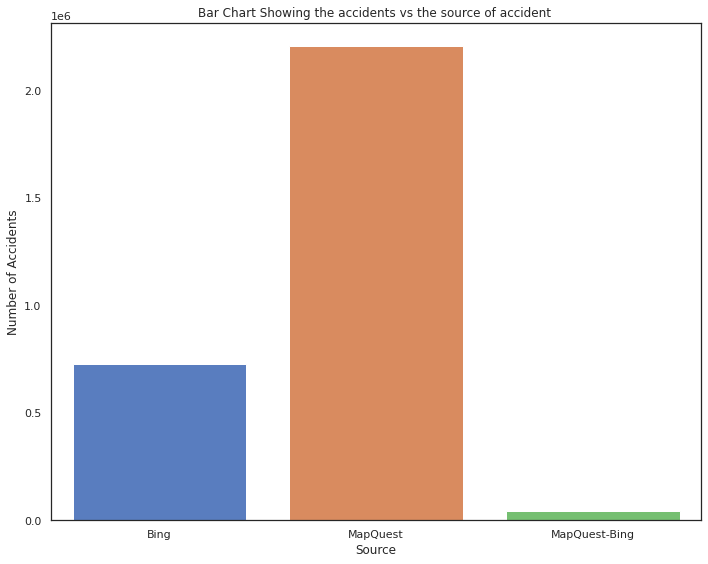

In [0]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(10,8))
sns.despine(left=True)
g = sns.barplot(x=us_accidents_grouped_sources.index, y= us_accidents_grouped_sources['sources'])
g.set_title("Bar Chart Showing the accidents vs the source of accident ")
g.set_ylabel("Number of Accidents")
plt.tight_layout()
# plt.xticks(rotation=90)



The main source of the data was MapQuest followed by Bing. Now, let's investigate the amount of accidents per Traffic Message Channels(TMC). 
Traffic Message Channel is a technology for delivering traffic and travel information to motor vehicle drivers. It is digitally coded using the ALERT C or TPEG protocol into RDS Type 8A groups carried via conventional FM radio broadcasts and its purpose is to deliver information about traffic distortions or warnings to mobile receivers such as navigation devices.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

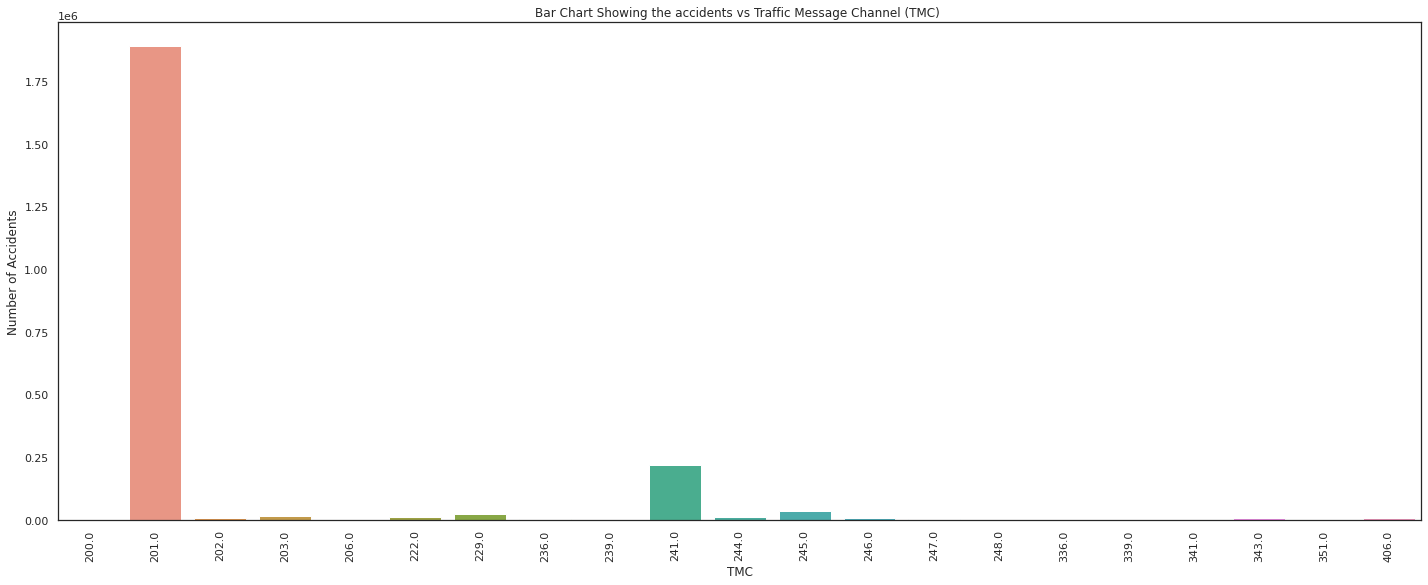

In [0]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(20,8))
sns.despine(left=True)
g = sns.barplot(x=us_accidents_grouped_tmc.index, y= us_accidents_grouped_tmc['tmc'])
g.set_title("Bar Chart Showing the accidents vs Traffic Message Channel (TMC) ")
g.set_ylabel("Number of Accidents")
plt.tight_layout()
plt.xticks(rotation=90)


The from the barplot, the main TMC is 201 (with aroung 1.8mill) accidents followed by 241 with around 250000 accidents and then with 245 with around 100k accidents. TMC 201 corresponds to a non serious accident and given that the majority of severities are between 2 and 3 this makes sense. 
TMC 241 corresponds to a non serious accident with the Right lane blocked, given - given the share amount of accidents corresponding to TMC 241. This is quite interesting! Next we look at a bar plot showing the number of accidents per severity. 

<Figure size 432x288 with 0 Axes>

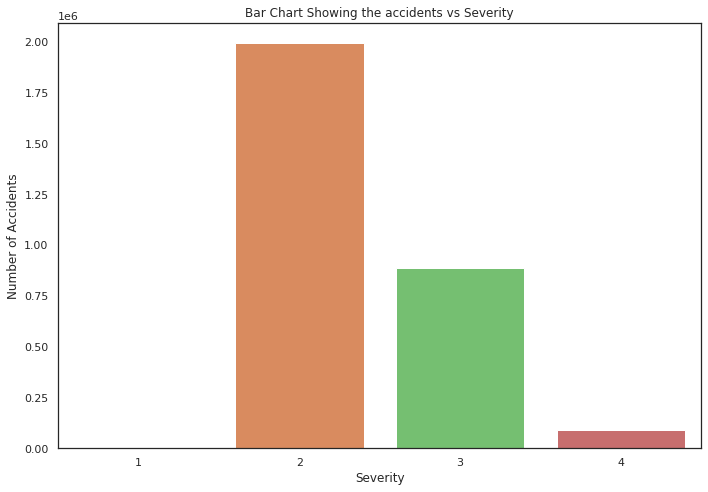

In [0]:
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)
plt.figure(figsize=(10,7))
g = sns.barplot(x=us_accidents_grouped_servity.index, y= us_accidents_grouped_servity['severity'])
g.set_title("Bar Chart Showing the accidents vs Severity")
g.set_ylabel("Number of Accidents")
plt.tight_layout()

Again, as we expected, the number majority of severities are between 2 an 3. With 2 being the majority. There are arounf 2 million accidents with severity 2 and 900k with severity 3. The amount of accidents with severity 1 is insignificant compared to the others! Next I figured that it'll be interesting to examine the duration of accidents (per 5 mins) vs the number of accidents during that time. 

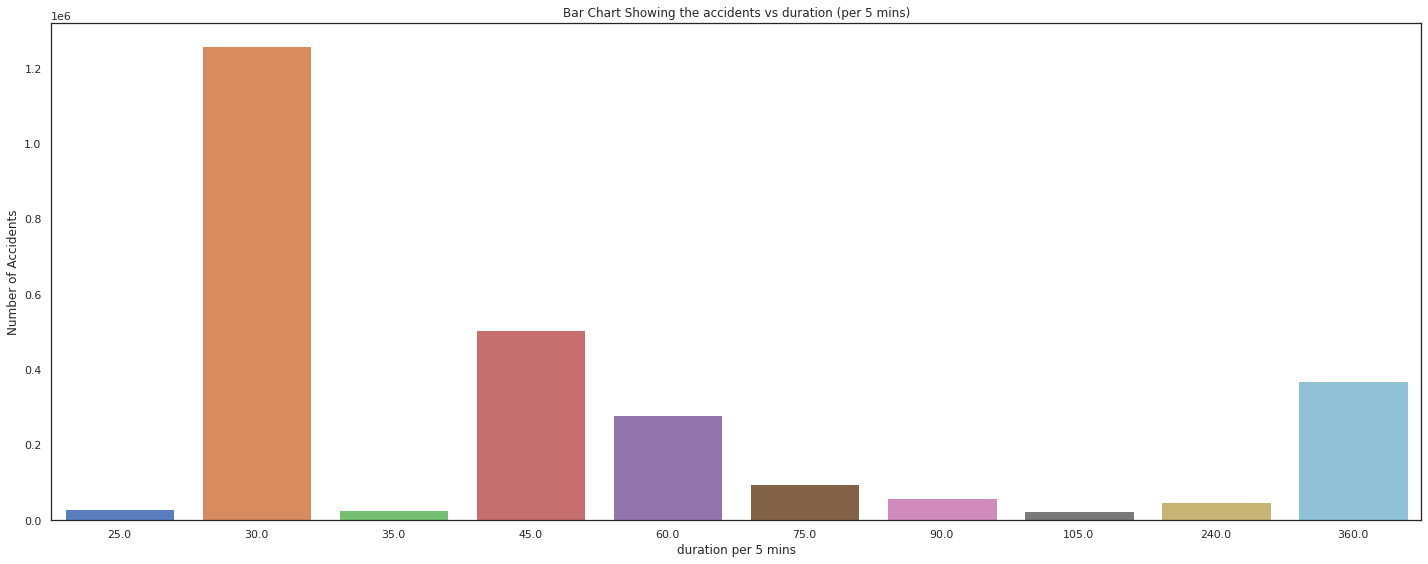

In [0]:
us_accidents_grouped_duration = us_accidents_grouped_duration.sort_values(by='durations', ascending=False)
# Display the top 10 values
us_accidents_grouped_duration = us_accidents_grouped_duration.head(10)
plt.figure(figsize=(20,8))
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)
g = sns.barplot(x=us_accidents_grouped_duration.index, y= us_accidents_grouped_duration['durations'])
g.set_title("Bar Chart Showing the accidents vs duration (per 5 mins)")
g.set_ylabel("Number of Accidents")
g.set_xlabel("duration per 5 mins")
plt.tight_layout()



Interesting the majority of accident seem to last for 30 mins with over 1.2 million accidents happening with that duration. The second highest is 45 mins with over 500k accidents happening during that duration. Coming in third was 6 hours with around 400k accidents. 
Note that the duration was found by taking the difference between the Start_Time and the End_Time. It doesn't reallty make sense for an accident to last 6 hours or more, so this can potentially be an error in recording or simply means that the End_Time takes in account the time taken to remove the cars from the street/resolve issues with the accident etc. 
Now, we shall examine the changes in the number of accidents per week to investigate the time aspect of our data. 

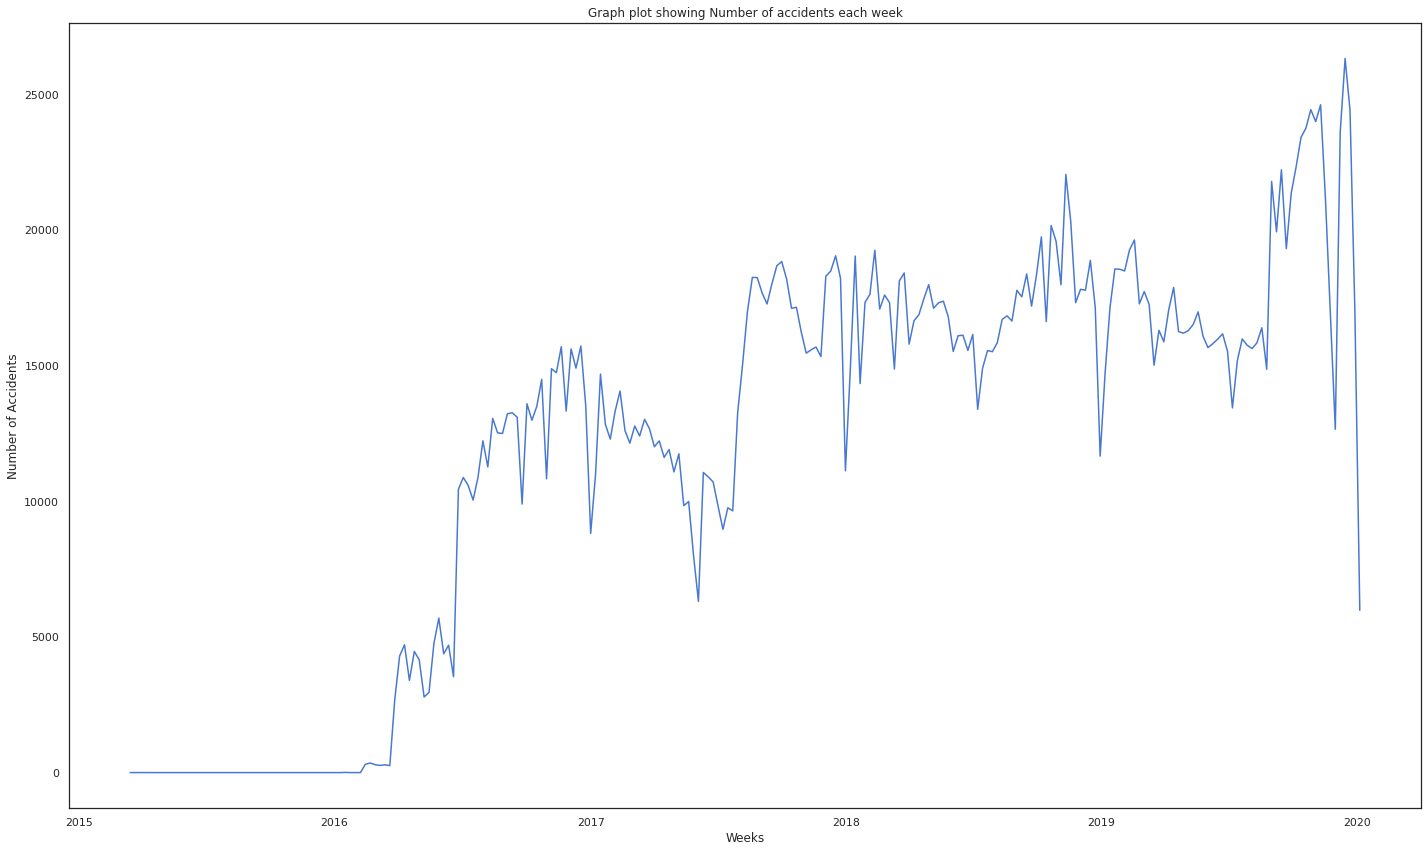

In [0]:
plt.figure(figsize=(20,12))
g = sns.lineplot(data=us_accidents_df_group_week, x=us_accidents_df_group_week.index,y='ID')
g.set_title("Graph plot showing Number of accidents each week")
g.set_ylabel("Number of Accidents")
g.set_xlabel("Weeks")
plt.tight_layout()
# us_accidents_grouped_week


Not surprisingly, the number of accidents generally increases from 2015 to 2020. There is a period from 2017 to 2018 where there is a sharp increase, this also follows from 2019 to 2020. This increase seems to be around the month of August. Next we shall look at the distribution of accidents the US.

In [0]:
# Helper function to plot graphs for the different severities
BBox = ((us_accidents_df.Start_Lng.min(),   us_accidents_df.Start_Lng.max(),      
        us_accidents_df.Start_Lat.min(), us_accidents_df.Start_Lat.max()))
def graphImage(us_accidents_df):
    ruh_m = plt.imread('/content/map.JPG')
    fig, ax = plt.subplots(figsize = (20,15))
    ax.set_title('Plotting Accidents vs Location with Severity')
    ax.scatter(us_accidents_df.Start_Lng, us_accidents_df.Start_Lat, zorder=1, alpha= 0.2, c='b', s=10)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

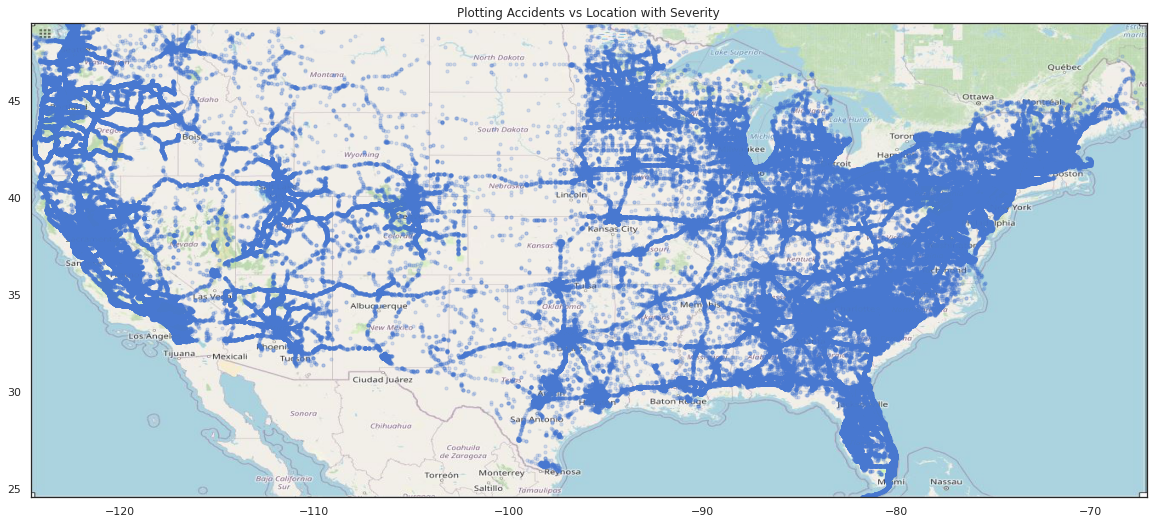

In [0]:
# Shows all the accidents across the united states from the data
graphImage(us_accidents_df)

Note that Midwestern states have the least number of accidents. For the most part, the accidents seemed to be distributed across every end of the country. Since this data is really dense, we shall look at the distributions for each severity. 

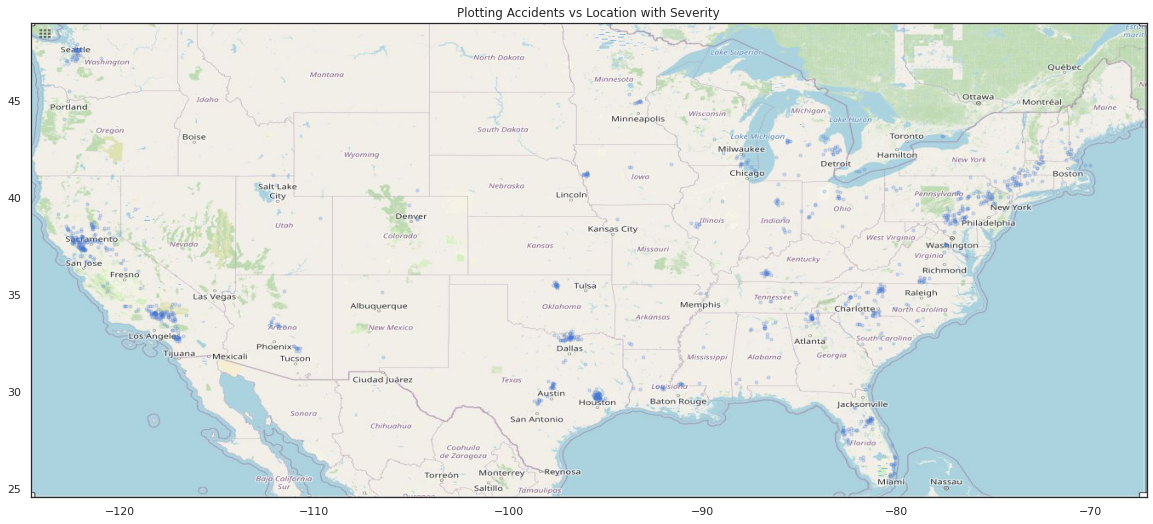

In [0]:
# Graph of accidents for Severity equals 1 
us_accidents_df_severity_one  = us_accidents_df.loc[us_accidents_df['Severity'] == 1] 
graphImage(us_accidents_df_severity_one)


The majority of severity one accidents seems to be in the urban areas of Texas, California and NYC. 

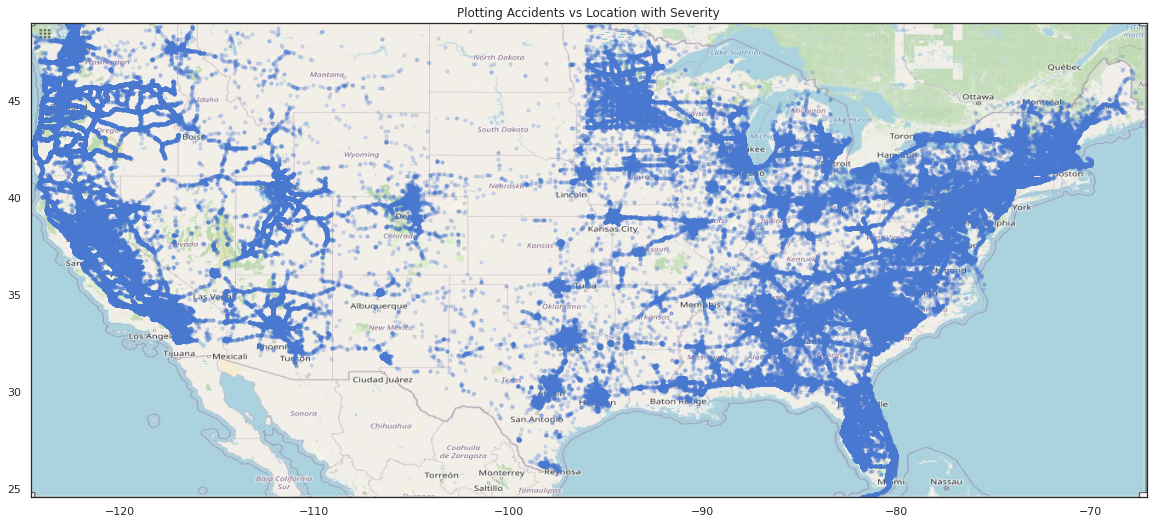

In [0]:
# Graph of accidents for Severity equals 2
us_accidents_df_severity_two  = us_accidents_df.loc[us_accidents_df['Severity'] == 2] 
graphImage(us_accidents_df_severity_two)


The severity two accidents seems mainly distributed across the east and west coasts of the US

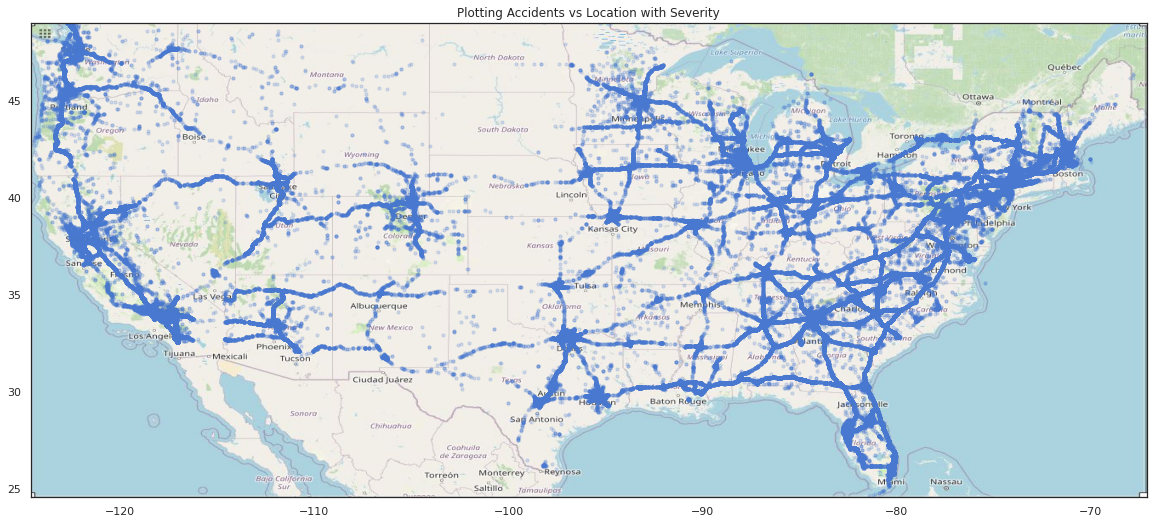

In [0]:
# Graph of accidents for Severity equals 3 
us_accidents_df_severity_three  = us_accidents_df.loc[us_accidents_df['Severity'] == 3] 
graphImage(us_accidents_df_severity_three)


The majority of severity three accidents seems to by on major highways 

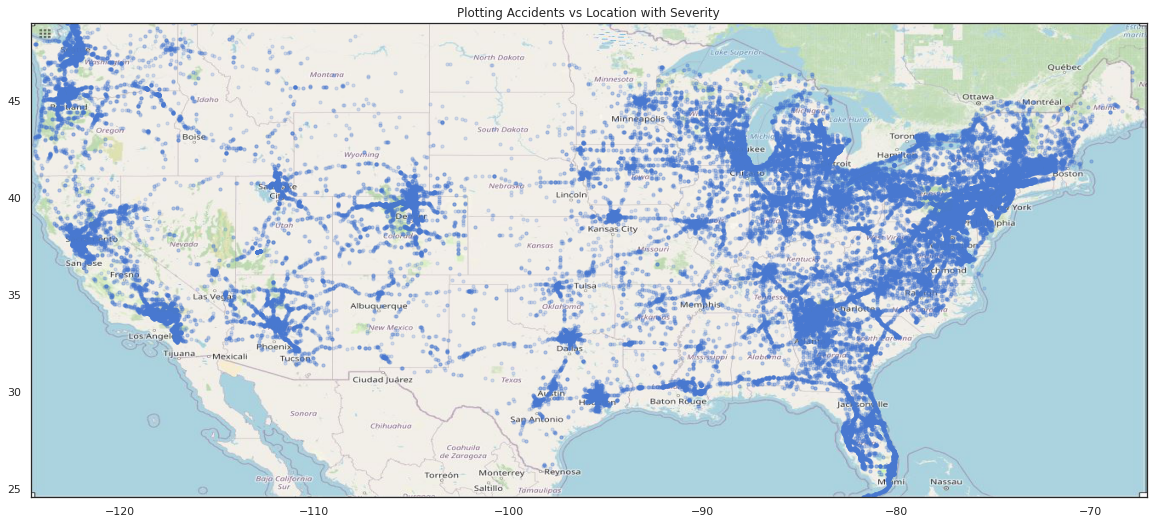

In [0]:
# Graph of accidents for Severity equals 4 
us_accidents_df_severity_four  = us_accidents_df.loc[us_accidents_df['Severity'] == 4] 
graphImage(us_accidents_df_severity_four)


The majority of severity four accidents seem to be mainly on the east coast! 
We shall then examine the amount of accidents per state. 

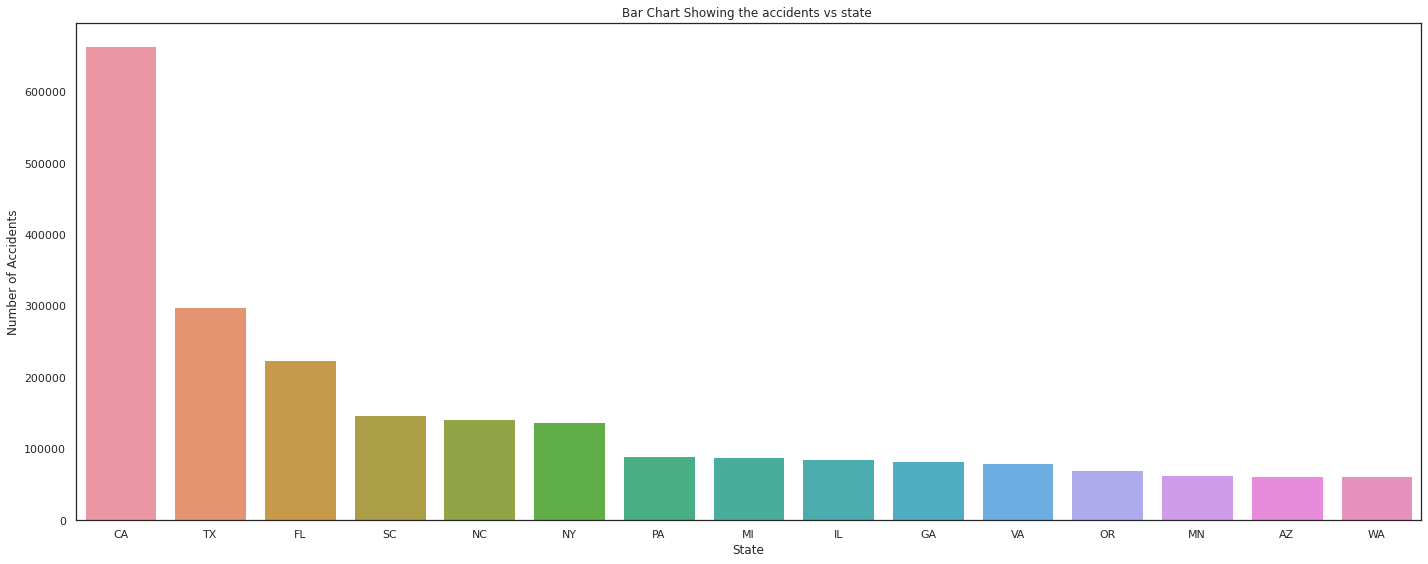

In [0]:
us_accidents_grouped_state = us_accidents_grouped_state.sort_values(by='states', ascending=False)
# Select the top 15 states to display
us_accidents_grouped_state = us_accidents_grouped_state.head(15); 
plt.figure(figsize=(20,8))
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)
g = sns.barplot(x=us_accidents_grouped_state.index, y= us_accidents_grouped_state['states'])
g.set_title("Bar Chart Showing the accidents vs state ")
g.set_ylabel("Number of Accidents")
g.set_xlabel("State")
plt.tight_layout()

The seven states with the most amounts of accidents are either in the east coast or the west coast. Note that CA and TX both have the most number of accidents, this makes sense given how densely populated these states are on the map.  Lastly, we shall look at investigate the changes of the differnt numerical features to severity. 

####v) Visualizing the different features vs Severity

*   Precipitation(in)
*   Temperature(F)
*   Wind_Chill(F)
*   Humidity(%)
*   Pressure(in)
*   Visibility(mi)
*   Wind_Speed(mph)

First we plot all the the numerical features on one map with the severity to see how they all change with time and to get an idea of the most important numerical features affecting the severity. 



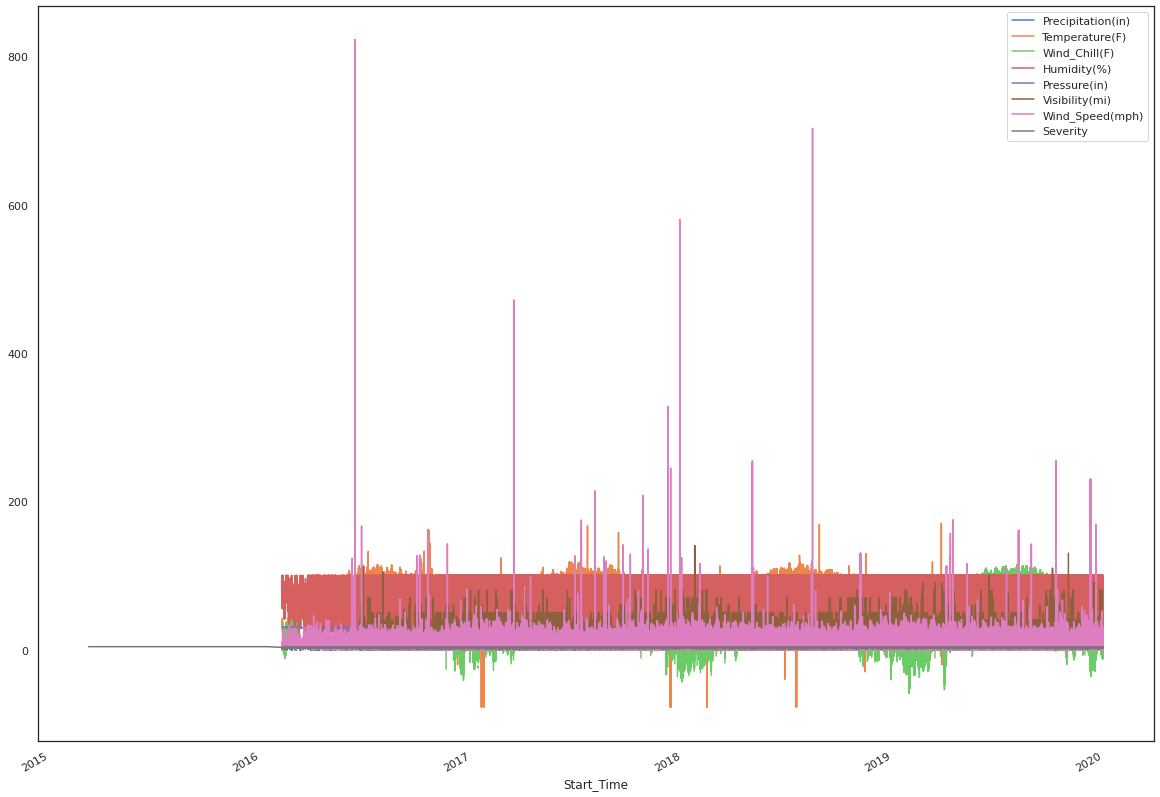

In [0]:
fig, ax = plt.subplots(figsize=(20, 15))
us_accidents_df.plot("Start_Time", "Precipitation(in)", ax = ax)
us_accidents_df.plot("Start_Time", "Temperature(F)", ax = ax)
us_accidents_df.plot("Start_Time", "Wind_Chill(F)", ax = ax)
us_accidents_df.plot("Start_Time", "Humidity(%)", ax = ax)
us_accidents_df.plot("Start_Time", "Pressure(in)", ax = ax)
us_accidents_df.plot("Start_Time", "Visibility(mi)", ax = ax)
us_accidents_df.plot("Start_Time", "Wind_Speed(mph)", ax = ax)
us_accidents_df.plot("Start_Time", "Severity", ax = ax)

This is not helpful at all, particularly because there are two many variables on one graph and the variables are not scaled. We shall scale these and plot on seperate graphs such that we can compare them. 

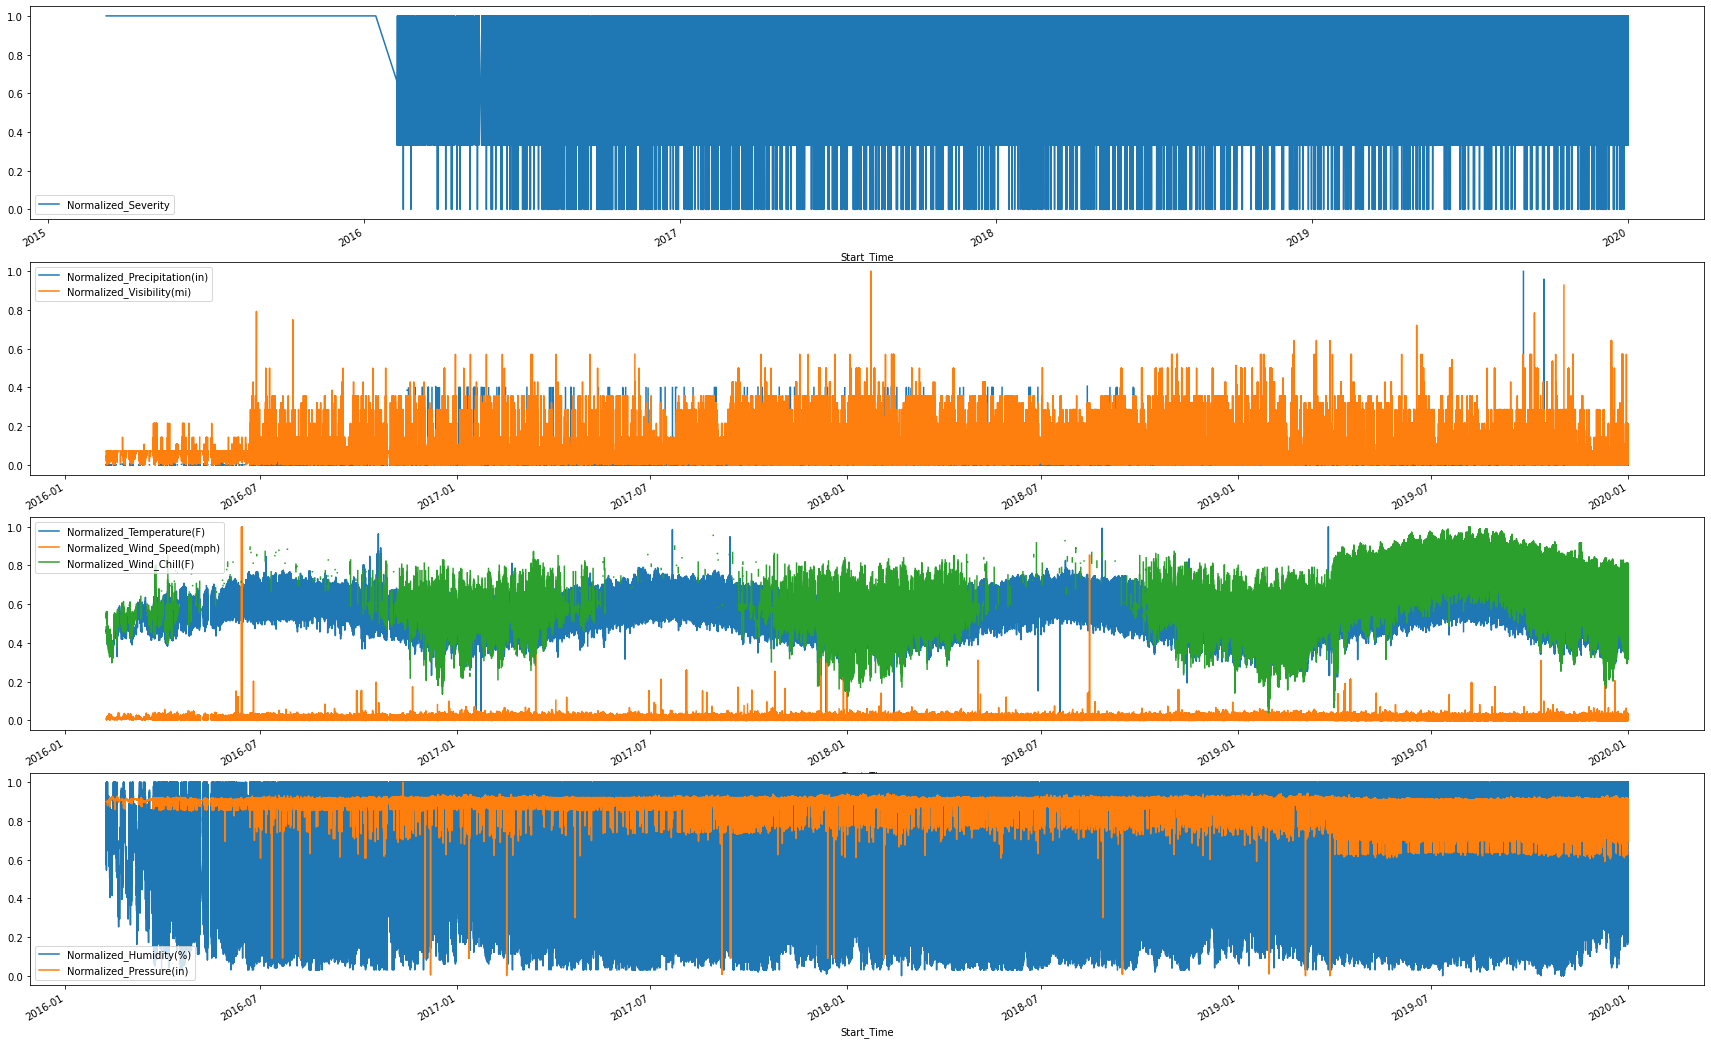

In [0]:
# ['Severity','Distance(mi)', 'Temperature(F)','Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
# normalize both columns using the mins and max values already calculated 
us_accidents_df['Normalized_Severity'] = us_accidents_df['Severity']/4;
us_accidents_df['Normalized_Severity'] = us_accidents_df['Severity'].apply(lambda x: (x-mins[0])/(maxs[0]-mins[0]));
us_accidents_df['Normalized_Precipitation(in)'] = us_accidents_df['Precipitation(in)'].apply(lambda x: (x-mins[8])/(maxs[8]-mins[8]));
us_accidents_df['Normalized_Temperature(F)'] = us_accidents_df['Temperature(F)'].apply(lambda x: (x-mins[2])/(maxs[2]-mins[2]));
us_accidents_df['Normalized_Wind_Chill(F)'] = us_accidents_df['Wind_Chill(F)'].apply(lambda x: (x-mins[3])/(maxs[3]-mins[3]));
us_accidents_df['Normalized_Humidity(%)'] = us_accidents_df['Humidity(%)'].apply(lambda x: (x-mins[4])/(maxs[4]-mins[4]));
us_accidents_df['Normalized_Pressure(in)'] = us_accidents_df['Pressure(in)'].apply(lambda x: (x-mins[5])/(maxs[5]-mins[5]));
us_accidents_df['Normalized_Visibility(mi)'] = us_accidents_df['Visibility(mi)'].apply(lambda x: (x-mins[6])/(maxs[6]-mins[6]));
us_accidents_df['Normalized_Wind_Speed(mph)'] = us_accidents_df['Wind_Speed(mph)'].apply(lambda x: (x-mins[7])/(maxs[7]-mins[7]));



fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30, 20))
us_accidents_df.plot("Start_Time", "Normalized_Severity", ax = axes[0])
us_accidents_df.plot("Start_Time", "Normalized_Precipitation(in)", ax = axes[1])
us_accidents_df.plot("Start_Time", "Normalized_Visibility(mi)", ax = axes[1])
us_accidents_df.plot("Start_Time", "Normalized_Temperature(F)", ax = axes[2])
us_accidents_df.plot("Start_Time", "Normalized_Wind_Speed(mph)", ax = axes[2])
us_accidents_df.plot("Start_Time", "Normalized_Wind_Chill(F)", ax = axes[2])
us_accidents_df.plot("Start_Time", "Normalized_Humidity(%)", ax = axes[3])
us_accidents_df.plot("Start_Time", "Normalized_Pressure(in)", ax = axes[3])



Due to the the high variance and amount of data is it very difficult to observe and generalize any trends bewteen the numerial features and the severity of the accidents. However, the frequent and numerous outliers in the data may suggest that these are indicative of an accident occuring. 

## Inference from Vizualizing the data 

We have seen the number accidents happen over time, investigate the locations of each accident based on its severity. We have also looked at the changes of the features over time along with the severity. We were also able to make inferences about the data like the month of most accidents, the most frequent duration and TMC score. 
We shall now create a model to predict the severity score! 



# 4)  Model (Modeling)



#### i)  Cleaning the data again for the Model 

*   Remove uncessary coloumns
*   Drop Nans


We keep all numerical features besides the lognitude and latitude ones and we keep all the boolean features. Furthermore, we keep the following categorical features - State, Wind_Direction, Sunrise_Sunset. That is, 
(ID, Source, Description, Street, Side, City, County, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Weather_Condition, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight) features were removed from our dataframe as these don't give us much additional data than we already have/is useless for our model. 
  

In [0]:
us_accidents_df_cleaned  = us_accidents_df[['TMC','Distance(mi)', 'Wind_Chill(F)','Humidity(%)','Pressure(in)',
                             'Visibility(mi)','duration','Temperature(F)','Wind_Speed(mph)','Precipitation(in)',
                             'Amenity','Wind_Direction','Crossing','Give_Way','Junction','No_Exit','Railway',
                             'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Severity','Sunrise_Sunset','Bump','State' ]]
us_accidents_df_cleaned = us_accidents_df_cleaned.dropna(); 

# us_accidents_df_cleaned.dtypes



#### ii) Feature Extraction and Correlation analysis 
Before we do one hot encoding to the categorical featueres, we shall do a correlation analysis to find the features that are highly correlated with  severity. This is very helpful as it tells us the most important features to include in our dataframe. A correlation value of 1 (dark red in this image) means that the features are highly correlated whereas a correlation value of 0 (light blue in this image) means that they're not correlated at all. 
For example, for the middle diagonal is red (correaltion 1) as variable have a correaltion of 1 with themselves. 
From the figure below, it seems that 'junction', 'stop', 'wind_direction' and visibility features are the most correlated to the severity values! This is particularly interesting because I figured that precipitation would've been higly correlated with severity. 

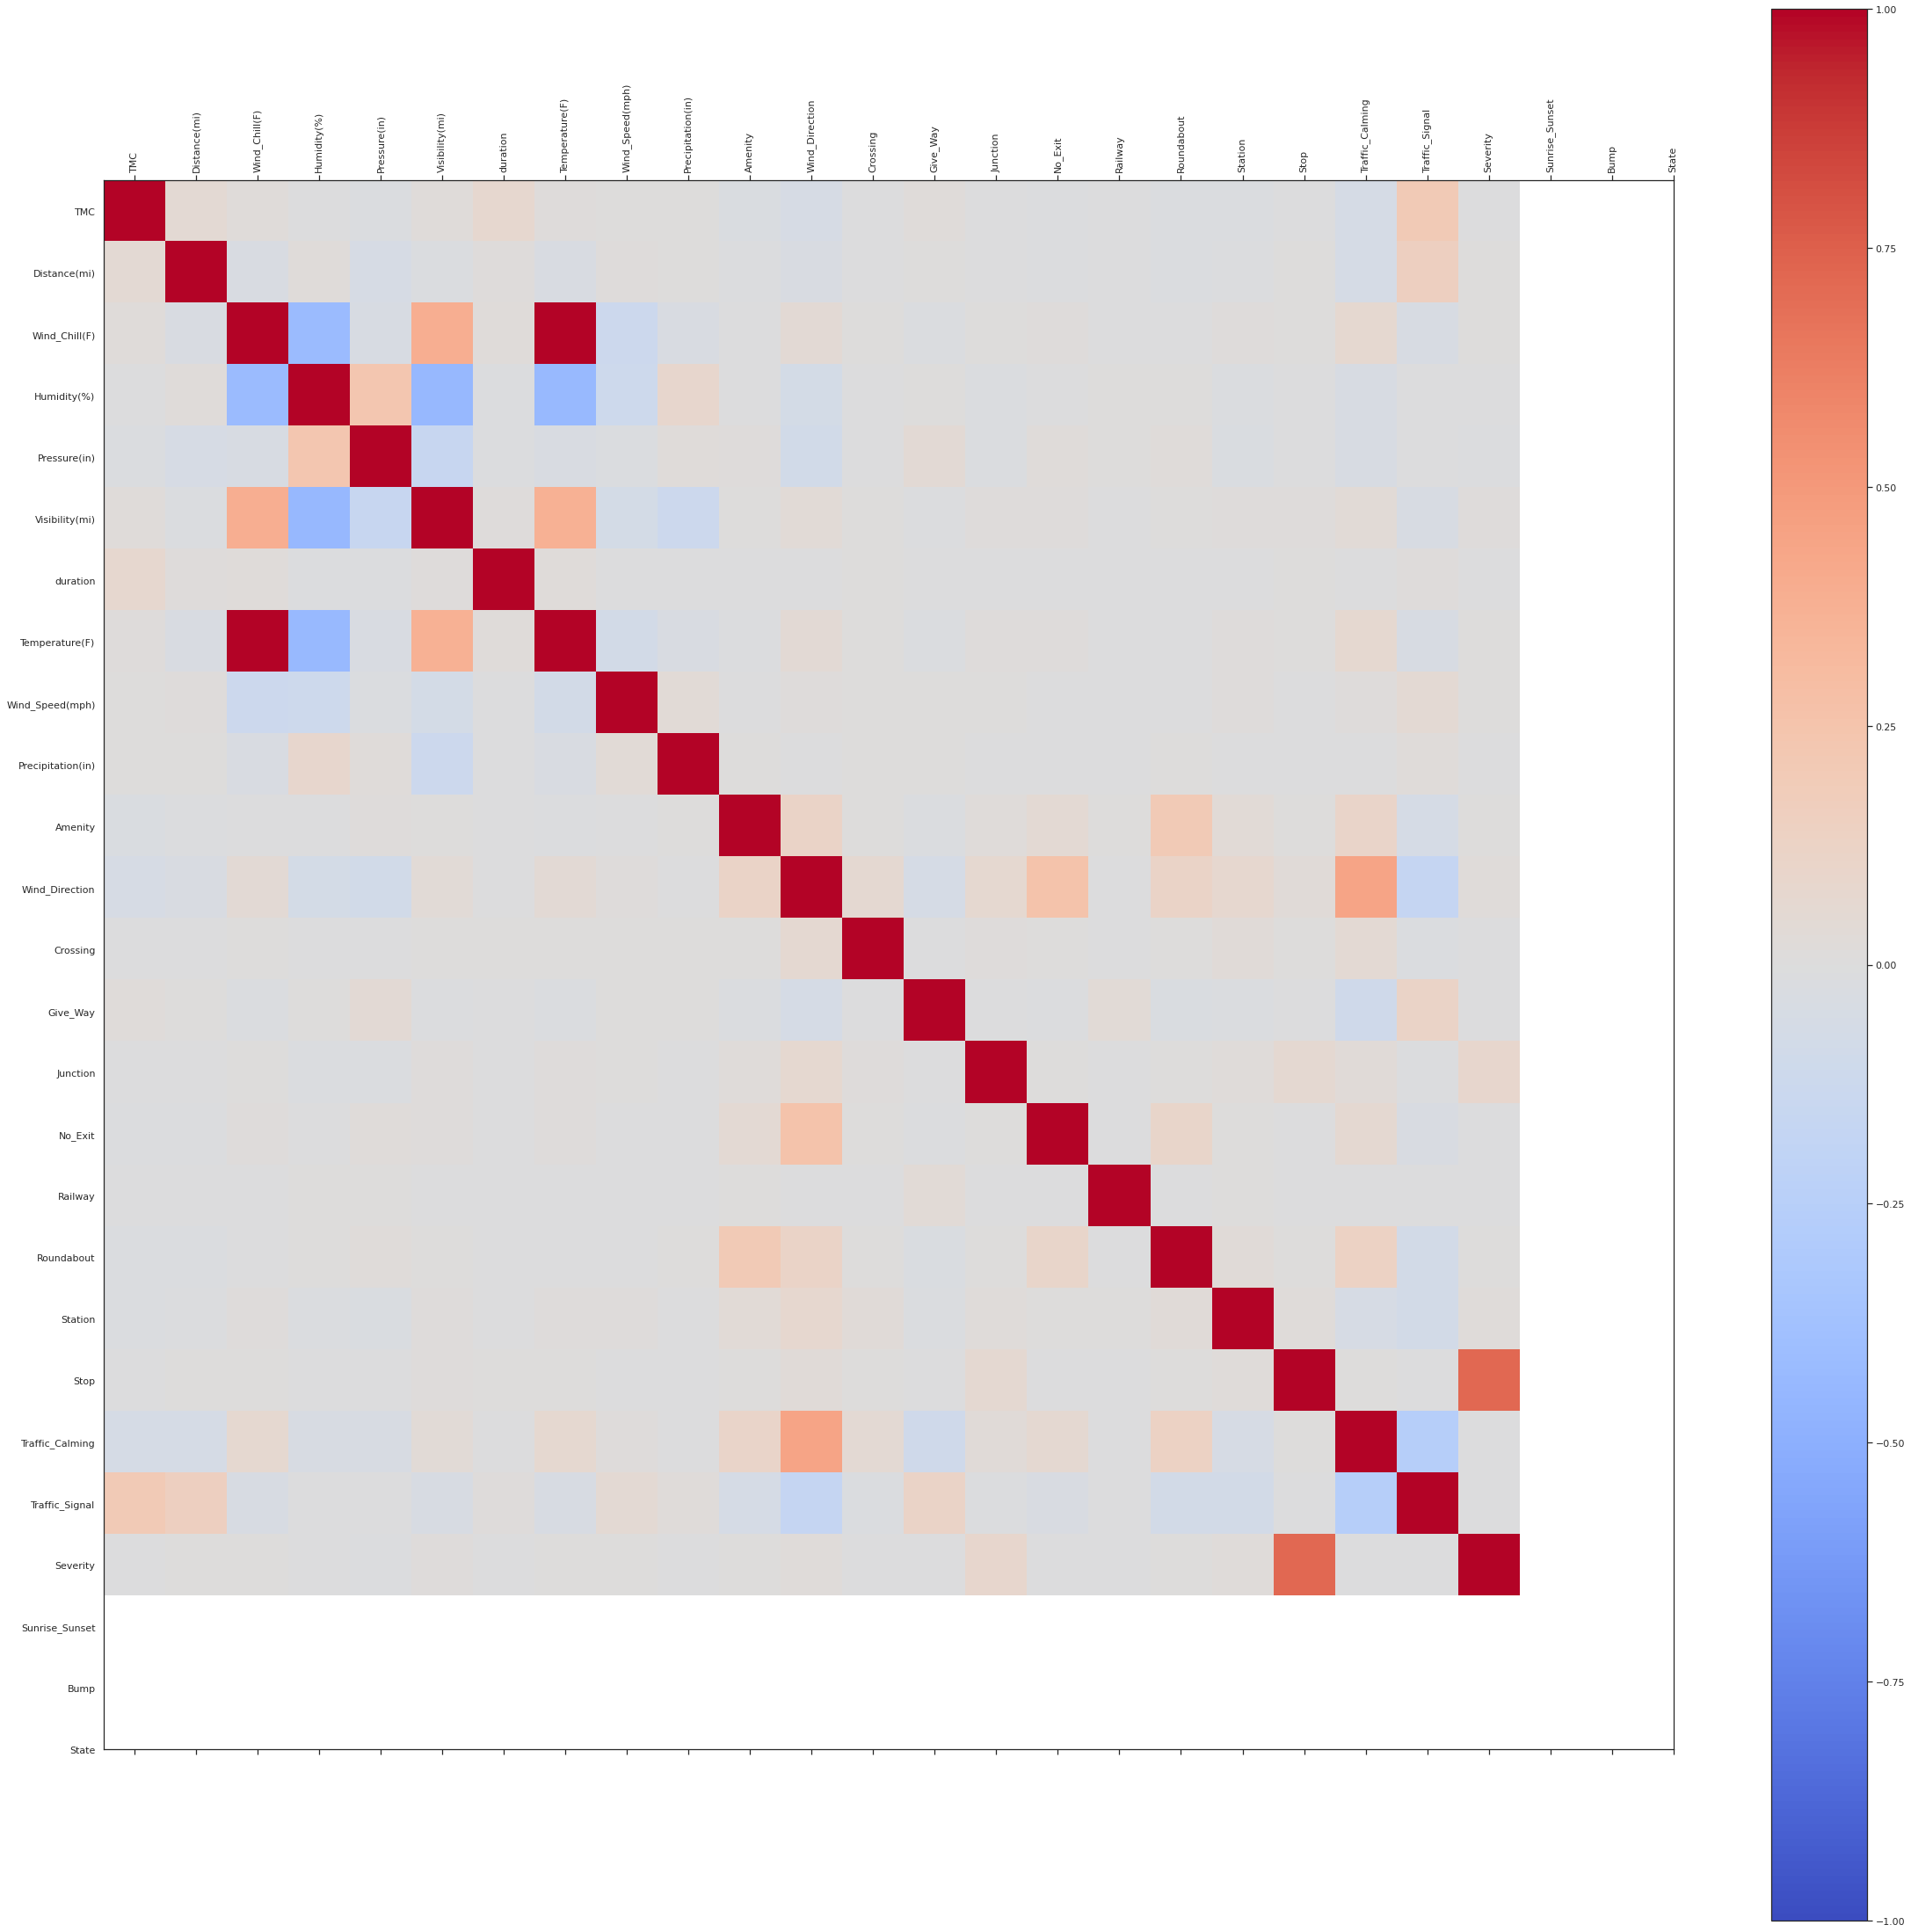

In [0]:
# Create the correlation matrix and plot it! 
corr = us_accidents_df_cleaned.corr()
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(us_accidents_df_cleaned.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(us_accidents_df_cleaned.columns)
ax.set_yticklabels(us_accidents_df_cleaned.columns)
plt.show()



### iii) Convert Categorial Features to one hot vectors using one hot encoding to the necessary coloumns (State, Wind_Direction, Sunrise_Sunset) for our model. 








In [0]:
# Convert the necessary coloumns in the dataframe to categorical
us_accidents_df_cleaned.State = us_accidents_df_cleaned.State.astype('category')
us_accidents_df_cleaned.Wind_Direction = us_accidents_df_cleaned.Wind_Direction.astype('category')
us_accidents_df_cleaned.Sunrise_Sunset = us_accidents_df_cleaned.Sunrise_Sunset.astype('category')
# Convert these coloumns into one hot vectors 
us_accidents_df_cleaned = pd.get_dummies(us_accidents_df_cleaned, columns=['State', 'Wind_Direction', 'Sunrise_Sunset'])    


### iv) Split into the x and y  and train and test data
That is, split the data into features and label. Note that the label is the serverity score. 

In [0]:
# Split into x and y
label = us_accidents_df_cleaned['Severity']
features = us_accidents_df_cleaned.drop(['Severity'],axis = 1); 
# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=.30)



v) Standardize the data


In [0]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### v) Logisitic Regression Model I  (Baseline model with max dimensions)




In [0]:
def baseline_model(x_train, x_test):
    model = LogisticRegression(solver = 'lbfgs', max_iter= 100, n_jobs=-1)
    model.fit(x_train, y_train)

    # use the model to make predictions with the test data
    y_pred = model.predict(x_test)
    # how did our model perform (Validate the Model)
    count_misclassified = (y_test != y_pred).sum()
    print('Misclassified samples: %s' % count_misclassified)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy)) 



In [0]:
# baseline Model 
baseline_model(x_train, x_test)

Misclassified samples: 46409
Accuracy: 0.72


The baseline model isn't performing ideally but 72% is an okish start. 
This might be due to the fact that the model is overfitting the training set - possibly due to too many feature. 
We shall try to increase this accuracy using hyperparameter tuning using different regression penalities, using randomForests and preprocessing with PCA. 

### vi) Logisitic Regression Model II (With Hyperparameter Tuning) 

In [0]:
C = [10, 1, .1, .001];
best_test_score_l1 = 0;
best_test_score_l2 = 0;
best_test_score_elastic = 0;
# accuracy from previous model 
accuracy = 0.72
for c in C:
    # (L1) penalty 
    lr_l1_model = LogisticRegression(penalty='l1', C=c, solver='saga', max_iter= 100,  n_jobs = -1).fit(x_train, y_train);
    # (l2) penalty
    lr_l2_model = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter= 100,  n_jobs = -1).fit(x_train, y_train);
    # Elastic net 
    lr_elastic_net_model = LogisticRegression(penalty='elasticnet', C=c, solver='saga',  max_iter= 100, n_jobs = -1, l1_ratio= 0.5).fit(x_train, y_train);

    # Make predictions
    l1_predictions = lr_l1_model.predict(x_test);
    l2_predictions = lr_l2_model.predict(x_test);
    elastic_net_predictions = lr_elastic_net_model.predict(x_test);

    # Compute error on test set for each of the models
    test_score_l1 = metrics.accuracy_score(y_test, l1_predictions)
    test_score_l2 = metrics.accuracy_score(y_test, l2_predictions)
    test_score_elastic = metrics.accuracy_score(y_test, elastic_net_predictions)
    # Get the best Model by finding the one with the best test_score
    if (test_score_l1 > best_test_score_l1):
        best_test_score_l1 = test_score_l1;
        print("c = %s" % c)
    if (test_score_l2 > best_test_score_l2):
        best_test_score_l2 = test_score_l2;
        print("c = %s" % c)
    if (test_score_elastic > best_test_score_elastic):
        best_test_score_elastic = test_score_elastic;
        print("c = %s" % c)

    print("accuracy_baseline = %s,  accuracy_l1 (c = %s) = %s, test_score_l2 (c = %s) = %s, test_score_elastic(c = %s) = %s" % (accuracy, c, test_score_l1, c, test_score_l2, c , test_score_elastic))
print("------------------------END OF TABLE-----------------------------------")

# Taking best model fom the table below 
test_score_l1 = best_test_score_l1 # c = 
test_score_l2 = best_test_score_l2 # c = 
test_score_elastic = best_test_score_elastic # c

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


c = 10
c = 10
c = 10
accuracy_baseline = 0.72,  accuracy_l1 (c = 10) = 0.7241299427980826, test_score_l2 (c = 10) = 0.7243794215656575, test_score_elastic(c = 10) = 0.7241358827687391


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy_baseline = 0.72,  accuracy_l1 (c = 1) = 0.7241180628567695, test_score_l2 (c = 1) = 0.7243319018004051, test_score_elastic(c = 1) = 0.7241121228861129


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


c = 0.1
accuracy_baseline = 0.72,  accuracy_l1 (c = 0.1) = 0.7241418227393956, test_score_l2 (c = 0.1) = 0.7243675416243444, test_score_elastic(c = 0.1) = 0.7241180628567695


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy_baseline = 0.72,  accuracy_l1 (c = 0.001) = 0.7223835914250584, test_score_l2 (c = 0.001) = 0.7239042239131339, test_score_elastic(c = 0.001) = 0.7232211272876312
------------------------END OF TABLE-----------------------------------


In [0]:
print('best_test_score_l1 = %s with C = 0.1 ' % test_score_l1) 
print('best_test_score_l2 = %s with C = 10' % test_score_l2) 
print('best_test_score_elastic = %s with C = 10' % test_score_elastic)

best_test_score_l1 = 0.7241418227393956 with C = 0.1 
best_test_score_l2 = 0.7243794215656575 with C = 10
best_test_score_elastic = 0.7241358827687391 with C = 10


From the logistic regression hypertuning above, the best models generally seem to have the inverse regularization strength, C = 10. 
In all of the models, the accuracy was around 0.72. 
As C decreased, (stronger regularization) the accuracy decreased but not by a drastic amount. Overall the best model here from our search was found to be the logisticRegression model with l2 penalty and C = 10. 
This low accuracy might be due to the fact that our model is not complex enough or it is overfitting. If it was overfitting drastically, tuning the hyperparameters should have increase the accuracy by at least 0.1%. This suggest that we need a more complex model. We shall be using RandomForests

### vii) Random Forest Classifier  (Model III) 

In [0]:
#  Create the parameter grid with hyperparams
param_grid = {
    'max_depth': [40,60],
    'n_estimators': [250, 300]
}
# Create a based model
rf = RandomForestClassifier(min_samples_leaf=3, n_jobs=-1)
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)
grid_search.fit(x_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(x_test)

# Evaluate the model
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: %s' % count_misclassified)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy)) 


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Misclassified samples: 40283
Accuracy: 0.76


In [0]:
print(grid_search.best_params_)

{'max_depth': 60, 'n_estimators': 250}


- Initally, I started with a small grid  with 'max_depth': [4,8],   'n_estimators': [40, 80]. When this was used, the best_paramas_ were found to be {'max_depth': 8, 'n_estimators': 80} with an accuracy of 0.72%. After, I went up to 'max_depth': [10,15],   'n_estimators': [100, 150]. For this search, the best_paramas_ were found to be {'max_depth': 15, 'n_estimators': 150} with an accuracy of 0.74%. Prenultimatly, a large grid was used with 'max_depth': [15,30],   'n_estimators': [150, 200]. From this, the best_paramas_ were found to be {'max_depth': 30, 'n_estimators': 200} with an accuracy of 0.75%. 
Lastly, a huge grid was used with 'max_depth': [40,60],   'n_estimators': [250, 300]. From this, the best_paramas_ were found to be {'max_depth': 60, 'n_estimators': 250} with an accuracy of 0.76%.

- Generally it seems increasing the max_depth and num_estimators makes our model more accurate as it is more complexity and well fitted to the training data. However, too big of a tree takes too long to run consuming a large chunk of ram and overfits the data. 

- The RandomForest Model was able to give the most accurate model but only by an increase of 4%




###vi) PCA on the training set

- Since the time taken on the initial baseline_model is long, the accuracy is low (0.72%) and the there are a lot of features. PCA is used to reduce over-fitting as we're working in a lower dimensional space(less features) 

Text(0, 0.5, 'explained_variance_ratio')

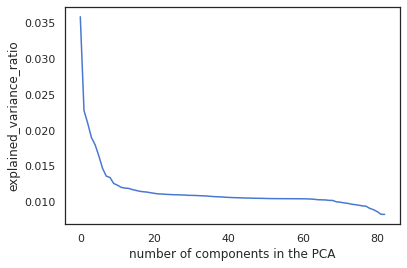

In [0]:
pca_comp = (pca.explained_variance_ratio_);
plt.plot(pca_comp)
plt.xlabel('number of components in the PCA')
plt.ylabel('explained_variance_ratio')



From the plot, we can see that the number of number of components that give us 95% variance is 83 components. 

In [0]:
# Fitting PCA to our our base Model
pca = PCA(n_components=83) # gives us 95% of variance
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
baseline_model(x_train, x_test);


Misclassified samples: 47377
Accuracy: 0.72


The end result fo PCA is similar to our baseline model with an accuracy of 0.72 
That, PCA wasn't super useful in improving the accuracy in this case. 


#  5) Conclusion

The best model was derived from a randomForestClassifier with parameters{'max_depth': 60, 'n_estimators': 250} and was found to have an accuracy of 76%

# 6) Description of Challenges/ Obstacles Faced

Cleaning the data before model lead to a huge lost of information (92%) of the rows were deleted. Futhermore, the time take to run each model was expoential and it was difficult to tune the hyperparameters. 

# 7) Potential Next Steps/ Future Direction


Future steps would revolve around creating a better model with an accuracy of at least 90%. This can be done as follows
- Before dropping the NaNs fill in the missing data using mean and regression based imputations and then feed that into the model 
- Use deep learning, for example, we can make use of the time of accidents aspect of the data and create a Long Short-Term Memory (LSTM) model. 

<!-- -->